### eigenvector analysis of compartment strength to determine monomer types  

starting with chromosomes 4, 13, 17  
each bead is 100kb, with 5 adjacent monomers assigned to each 500kb hic bin  
The first 3mb (30) beads will be assigned as centromeres/type C

Could either average compartment score across lower resolution cooler or just 
take labels from 500kb resolution


In [9]:
# import standard python libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os, subprocess
# Import python package for working with cooler files and tools for analysis
import cooler
import cooltools.lib.plotting
from packaging import version
if version.parse(cooltools.__version__) < version.parse('0.5.4'):
    raise AssertionError("tutorials rely on cooltools version 0.5.4 or higher,"+
                         "please check your cooltools version and update to the latest")
import cooltools

import matplotlib
print(matplotlib.__version__)
import cooltools.lib.plotting
#needs matplotlib version 3.7.1

3.7.1


In [10]:
ME_mcool = '/Users/kadendimarco/Desktop/Shrivinas_lab/genome_archetecture/Megaenhancers/experimental_data/4DNFIZ39QE5I.mcool'
cooler.fileops.list_coolers(ME_mcool)

['/resolutions/1000',
 '/resolutions/2000',
 '/resolutions/5000',
 '/resolutions/10000',
 '/resolutions/25000',
 '/resolutions/50000',
 '/resolutions/100000',
 '/resolutions/250000',
 '/resolutions/500000',
 '/resolutions/1000000',
 '/resolutions/2500000',
 '/resolutions/5000000',
 '/resolutions/10000000']

In [12]:
clr_500kb = cooler.Cooler(f'{ME_mcool}::resolutions/500000')
clr_50kb = cooler.Cooler(f'{ME_mcool}::resolutions/50000')

In [11]:
## fasta sequence is required for calculating binned profile of GC conent
# Set the path for mm10.fa in experimental_data directory
mm10_path = '/Users/kadendimarco/Desktop/Shrivinas_lab/genome_archetecture/Megaenhancers/experimental_data/mm10.fa'

# Check if mm10.fa exists in experimental_data
if not os.path.isfile(mm10_path):
    print("mm10.fa not found in experimental_data. Downloading...")
    ## note downloading a ~1Gb file can take a minute
    # Change to experimental_data directory for download
    os.chdir('/Users/kadendimarco/Desktop/Shrivinas_lab/genome_archetecture/Megaenhancers/experimental_data')
    subprocess.call('wget --progress=bar:force:noscroll https://hgdownload.cse.ucsc.edu/goldenpath/mm10/bigZips/mm10.fa.gz', shell=True)
    subprocess.call('gunzip mm10.fa.gz', shell=True)
    print("Download and extraction complete!")
else:
    print("mm10.fa already exists in experimental_data.")

mm10.fa not found in experimental_data. Downloading...


--2025-07-01 17:01:52--  https://hgdownload.cse.ucsc.edu/goldenpath/mm10/bigZips/mm10.fa.gz
Resolving hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)|128.114.119.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 870141360 (830M) [application/x-gzip]
Saving to: ‘mm10.fa.gz’

mm10.fa.gz          100%[===================>] 829.83M  23.3MB/s    in 34s     

2025-07-01 17:02:27 (24.7 MB/s) - ‘mm10.fa.gz’ saved [870141360/870141360]



Download and extraction complete!


In [18]:
import bioframe

bins_500kb = clr_500kb.bins()[:]
# Add 'chr' prefix to match fasta chromosome names
#bins_500kb['chrom'] = 'chr' + bins_500kb['chrom'].astype(str)
bins_500kb['chrom'] = bins_500kb['chrom'].astype(str)

# Load the mm10 genome
mm10_path = '/Users/kadendimarco/Desktop/Shrivinas_lab/genome_archetecture/Megaenhancers/experimental_data/mm10.fa'
mm10_genome = bioframe.load_fasta(mm10_path)

# Check what chromosomes are in the mm10 genome
print("Chromosomes in mm10 genome:")
print(list(mm10_genome.keys())[:10])  # Show first 10 chromosomes

# Check what chromosomes are in your bins dataframe
print("\nChromosomes in bins dataframe:")
print(bins_500kb['chrom'].unique()[:10])  # Show first 10 chromosomes

# Check if there's a mismatch
bins_chroms = set(bins_500kb['chrom'].unique())
mm10_chroms = set(mm10_genome.keys())

missing_in_mm10 = bins_chroms - mm10_chroms
missing_in_bins = mm10_chroms - bins_chroms

print(f"\nChromosomes in bins but not in mm10: {missing_in_mm10}")
print(f"Chromosomes in mm10 but not in bins: {missing_in_bins}")

# If there are mismatches, let's see some examples
if missing_in_mm10:
    print(f"\nExamples of problematic chromosomes: {list(missing_in_mm10)[:5]}")

Chromosomes in mm10 genome:
['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18']

Chromosomes in bins dataframe:
['chr1' 'chr2' 'chr3' 'chr4' 'chr5' 'chr6' 'chr7' 'chr8' 'chr9' 'chr10']

Chromosomes in bins but not in mm10: set()
Chromosomes in mm10 but not in bins: {'chrUn_GL456367', 'chr4_GL456350_random', 'chr4_JH584294_random', 'chr4_JH584295_random', 'chrUn_GL456389', 'chrUn_GL456393', 'chr1_GL456210_random', 'chrUn_GL456239', 'chrUn_GL456372', 'chr4_JH584292_random', 'chrUn_JH584304', 'chr1_GL456213_random', 'chr5_GL456354_random', 'chr4_GL456216_random', 'chrUn_GL456396', 'chrY_JH584303_random', 'chrUn_GL456394', 'chrUn_GL456360', 'chrY_JH584301_random', 'chr7_GL456219_random', 'chr5_JH584297_random', 'chrY_JH584300_random', 'chrUn_GL456370', 'chrUn_GL456381', 'chr1_GL456211_random', 'chrX_GL456233_random', 'chrUn_GL456390', 'chrUn_GL456392', 'chr4_JH584293_random', 'chr1_GL456212_random', 'chrUn_GL456366', 'chr1_GL456221_random', 'chrM', 'ch

In [20]:
import bioframe
bins_500kb = clr_500kb.bins()[:]
# Add 'chr' prefix to match fasta chromosome names
#bins_500kb['chrom'] = 'chr' + bins_500kb['chrom'].astype(str)
bins_500kb['chrom'] = bins_500kb['chrom'].astype(str)


mm10_genome = bioframe.load_fasta(mm10_path);
## note the next command may require installing pysam
gc_cov_500kb = bioframe.frac_gc(bins_500kb[['chrom', 'start', 'end']], mm10_genome)
#gc_cov.to_csv('mm9_gc_cov_200kb.tsv',index=False,sep='\t')
display(gc_cov_500kb)

,chrom,start,end,GC
0,chr1,0,500000,NaN
1,chr1,500000,1000000,NaN
2,chr1,1000000,1500000,NaN
3,chr1,1500000,2000000,NaN
4,chr1,2000000,2500000,NaN
...,...,...,...,...
5457,chrY,89500000,90000000,0.381710
5458,chrY,90000000,90500000,0.387636
5459,chrY,90500000,91000000,0.421705
5460,chrY,91000000,91500000,NaN


In [21]:
view_df_500kb = pd.DataFrame({'chrom': clr_500kb.chromnames,
                        'start': 0,
                        'end': clr_500kb.chromsizes.values,
                        'name': clr_500kb.chromnames}
                      )
display(view_df_500kb)

,chrom,start,end,name
0,chr1,0,195471971,chr1
1,chr2,0,182113224,chr2
2,chr3,0,160039680,chr3
3,chr4,0,156508116,chr4
4,chr5,0,151834684,chr5
5,chr6,0,149736546,chr6
6,chr7,0,145441459,chr7
7,chr8,0,129401213,chr8
8,chr9,0,124595110,chr9
9,chr10,0,130694993,chr10


In [25]:
import bioframe

# First make sure bins have the correct chromosome format for fasta lookup
bins_df_500kb = clr_500kb.bins()[:]
bins_df_500kb['chrom'] = bins_df_500kb['chrom'].astype(str)

# Recalculate GC content
gc_cov_500kb = bioframe.frac_gc(
    bins_df_500kb[['chrom', 'start', 'end']], 
    mm10_genome,
    mapped_only=False
)

# Remove 'chr' prefix to match cooler chromosomes
#gc_cov_500kb['chrom'] = gc_cov_500kb['chrom'].str.replace('chr', '')

# Create proper view_df using bioframe
chromosomes = clr_500kb.chromnames
view_dict = {
    'chrom': chromosomes,
    'start': [0] * len(chromosomes),
    'end': [clr_500kb.chromsizes[chrom] for chrom in chromosomes]
}
view_df_500kb = bioframe.make_viewframe(pd.DataFrame(view_dict))

# Now try calculating eigenvectors
cis_eigs_500kb = cooltools.eigs_cis(
    clr_500kb,
    gc_cov_500kb,
    view_df=view_df_500kb,
    n_eigs=3,
    clr_weight_name='weight'
)

# cis_eigs[0] returns eigenvalues, here we focus on eigenvectors
eigenvector_track_500kb = cis_eigs_500kb[1][['chrom','start','end','E1']]

In [33]:
# Explore structure of eigenvector_track_500kb
print("Shape of eigenvector_track_500kb:")
print(eigenvector_track_500kb.shape)


print("\nFirst few rows of eigenvector_track_500kb:")
display(eigenvector_track_500kb.head(35))



Shape of eigenvector_track_500kb:
(5462, 4)

First few rows of eigenvector_track_500kb:


,chrom,start,end,E1
0,chr1,0,500000,NaN
1,chr1,500000,1000000,NaN
2,chr1,1000000,1500000,NaN
3,chr1,1500000,2000000,NaN
4,chr1,2000000,2500000,NaN
5,chr1,2500000,3000000,NaN
6,chr1,3000000,3500000,-0.834930
7,chr1,3500000,4000000,-1.010012
8,chr1,4000000,4500000,-1.422064
9,chr1,4500000,5000000,-0.662304


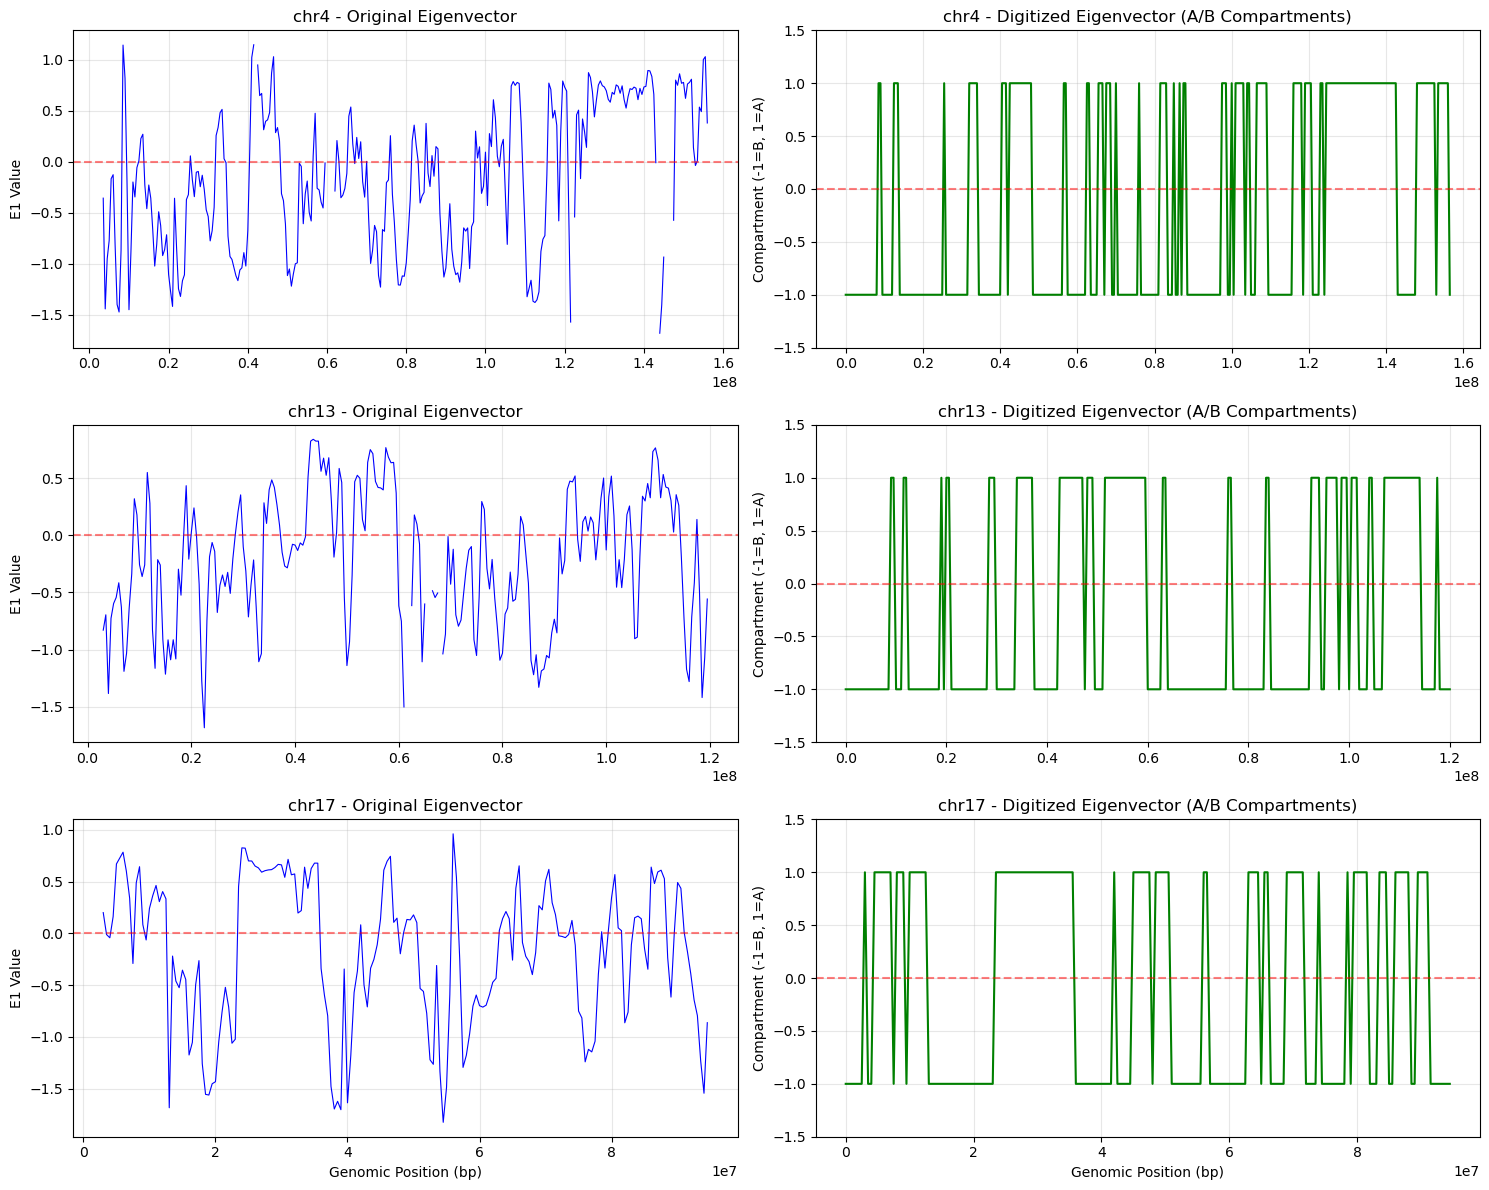

=== COMPARTMENT SUMMARY ===

chr4:
  Total bins: 314
  A compartments: 127 bins (40.4%)
  B compartments: 187 bins (59.6%)

chr13:
  Total bins: 241
  A compartments: 86 bins (35.7%)
  B compartments: 155 bins (64.3%)

chr17:
  Total bins: 190
  A compartments: 86 bins (45.3%)
  B compartments: 104 bins (54.7%)

=== AVAILABLE DATA ===
Digitized eigenvectors saved for: ['chr4', 'chr13', 'chr17']
Access data using: digitized_eigenvectors['chr4']['E1_digitized']


In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Define the chromosomes to plot
chroms_to_plot = ['chr4', 'chr13', 'chr17']

# Dictionary to store digitized eigenvectors for each chromosome
digitized_eigenvectors = {}

# Create subplots
fig, axes = plt.subplots(len(chroms_to_plot), 2, figsize=(15, 4*len(chroms_to_plot)))
if len(chroms_to_plot) == 1:
    axes = axes.reshape(1, -1)

for i, chrom in enumerate(chroms_to_plot):
    # Get data for this chromosome
    chrom_data = eigenvector_track_500kb[eigenvector_track_500kb['chrom'] == chrom]
    
    if len(chrom_data) == 0:
        print(f"No data found for {chrom}")
        continue
    
    
    # Plot original eigenvector
    axes[i, 0].plot(chrom_data['start'], chrom_data['E1'], 'b-', linewidth=0.8)
    axes[i, 0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
    axes[i, 0].set_title(f'{chrom} - Original Eigenvector')
    axes[i, 0].set_ylabel('E1 Value')
    axes[i, 0].grid(True, alpha=0.3)
    
    # Create digitized version
    digitized = np.where(chrom_data['E1'] > 0, 1, -1)
    
    # Save digitized eigenvector for this chromosome
    digitized_eigenvectors[chrom] = {
        'start': chrom_data['start'].values,
        'end': chrom_data['end'].values,
        'E1_original': chrom_data['E1'].values,
        'E1_digitized': digitized,
        'compartments': np.where(digitized == 1, 'A', 'B')
    }
    
    # Plot digitized eigenvector
    axes[i, 1].plot(chrom_data['start'], digitized, 'g-', linewidth=1.5)
    axes[i, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
    axes[i, 1].set_title(f'{chrom} - Digitized Eigenvector (A/B Compartments)')
    axes[i, 1].set_ylabel('Compartment (-1=B, 1=A)')
    axes[i, 1].set_ylim(-1.5, 1.5)
    axes[i, 1].grid(True, alpha=0.3)
    
    # Add y-axis labels for the rightmost plots
    if i == len(chroms_to_plot) - 1:
        axes[i, 0].set_xlabel('Genomic Position (bp)')
        axes[i, 1].set_xlabel('Genomic Position (bp)')

plt.tight_layout()
plt.show()

# Print summary statistics
print("=== COMPARTMENT SUMMARY ===")
for chrom in chroms_to_plot:
    if chrom in digitized_eigenvectors:
        data = digitized_eigenvectors[chrom]
        a_compartments = np.sum(data['E1_digitized'] == 1)
        b_compartments = np.sum(data['E1_digitized'] == -1)
        total_bins = len(data['E1_digitized'])
        
        print(f"\n{chrom}:")
        print(f"  Total bins: {total_bins}")
        print(f"  A compartments: {a_compartments} bins ({a_compartments/total_bins*100:.1f}%)")
        print(f"  B compartments: {b_compartments} bins ({b_compartments/total_bins*100:.1f}%)")

# Print available data for reference
print(f"\n=== AVAILABLE DATA ===")
print(f"Digitized eigenvectors saved for: {list(digitized_eigenvectors.keys())}")
print(f"Access data using: digitized_eigenvectors['chr4']['E1_digitized']")

In [85]:
print(digitized_eigenvectors['chr4']['E1_digitized'])
print(len(digitized_eigenvectors['chr4']['E1_digitized']))

#remember each index in digitized_eigenvectors is 500kb
print('adding c compartment')

# Change first 6 values to 2 (C compartment) for each chromosome
for chrom in digitized_eigenvectors:
    digitized_eigenvectors[chrom]['E1_digitized'][:6] = 2

print(digitized_eigenvectors['chr4']['E1_digitized'])

print('changing digitized eigenvector to monomer_types')
# Create monomer_types dictionary with same structure as digitized_eigenvectors
monomer_types = {}

# For each chromosome
for chrom in digitized_eigenvectors:
    # Get the digitized eigenvector array
    digitized = digitized_eigenvectors[chrom]['E1_digitized']
    
    # Convert: 1 -> 0 (A compartment), -1 -> 1 (B compartment)
    # 2 remains 2 (C compartment)
    monomer_types[chrom] = np.where(digitized == 1, 0, 
                                   np.where(digitized == -1, 1, digitized))

print("Conversion complete. Example from chr4:")
print(monomer_types['chr4'][:20])  # Print first 20 values as example


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1
 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1 -1  1  1  1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1 -1 -1 -1  1  1  1
  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1  1
  1  1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1 -1]
314
adding c compartment
[ 2  2  2  2  2  2

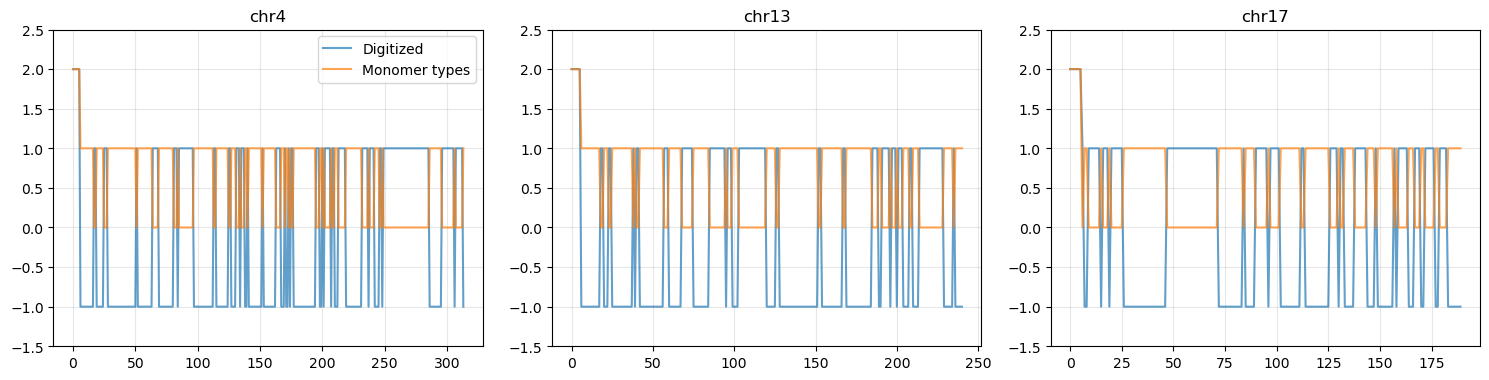

In [86]:
# Create a figure with 7 rows and 3 columns to fit all chromosomes
fig, axes = plt.subplots(7, 3, figsize=(15, 25))
axes = axes.flatten()

# Plot for each chromosome
for i, chrom in enumerate(digitized_eigenvectors.keys()):
    if i < len(axes):  # Make sure we don't exceed available axes
        ax = axes[i]
        
        # Get data for this chromosome
        digitized = digitized_eigenvectors[chrom]['E1_digitized']
        monomer = monomer_types[chrom]
        
        # Plot both on same axis
        ax.plot(digitized, label='Digitized', alpha=0.7)
        ax.plot(monomer, label='Monomer types', alpha=0.7)
        
        # Customize plot
        ax.set_title(chrom)
        ax.set_ylim(-1.5, 2.5)
        ax.grid(True, alpha=0.3)
        
        # Only show legend for first plot
        if i == 0:
            ax.legend()

# Remove any unused axes
for j in range(i+1, len(axes)):
    axes[j].remove()

plt.tight_layout()
plt.show()


last step, repeat each value 5 times and put everything in numpy array and save

In [87]:
import numpy as np

# Define the chromosome order
chrom_order = ['chr4', 'chr13', 'chr17']

# Initialize the flattened array
monomer_numpy = []

# Flatten and expand the monomer_types dict
for chrom in chrom_order:
    if chrom in monomer_types:
        # Get the monomer types for this chromosome
        chrom_monomers = monomer_types[chrom]
        
        # Expand each element into 5 identical elements
        for monomer in chrom_monomers:
            # Add 5 copies of this monomer type
            monomer_numpy.extend([monomer] * 5)

# Convert to numpy array
monomer_numpy = np.array(monomer_numpy)

# Print summary
print(f"Original monomer_types lengths:")
for chrom in chrom_order:
    if chrom in monomer_types:
        print(f"  {chrom}: {len(monomer_types[chrom])} elements")
    else:
        print(f"  {chrom}: Not found in monomer_types")

print(f"\nFlattened monomer_numpy array:")
print(f"  Total length: {len(monomer_numpy)}")
print(f"  Shape: {monomer_numpy.shape}")
print(f"  First 20 elements: {monomer_numpy[:20]}")
print(f"  Last 20 elements: {monomer_numpy[-20:]}")

# Verify the expansion worked correctly
print(f"\nVerification:")
for chrom in chrom_order:
    if chrom in monomer_types:
        original_length = len(monomer_types[chrom])
        expected_expanded_length = original_length * 5
        print(f"  {chrom}: {original_length} → {expected_expanded_length} elements")


# Save the monomer_numpy array
np.save('/Users/kadendimarco/Desktop/Shrivinas_lab/genome_archetecture/Megaenhancers/simulation_code/ME_monomer_types.npy', monomer_numpy)
print(f"Saved monomer types array to ME_monomer_types.npy")


Original monomer_types lengths:
  chr4: 314 elements
  chr13: 241 elements
  chr17: 190 elements

Flattened monomer_numpy array:
  Total length: 3725
  Shape: (3725,)
  First 20 elements: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
  Last 20 elements: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Verification:
  chr4: 314 → 1570 elements
  chr13: 241 → 1205 elements
  chr17: 190 → 950 elements
Saved monomer types array to ME_monomer_types.npy


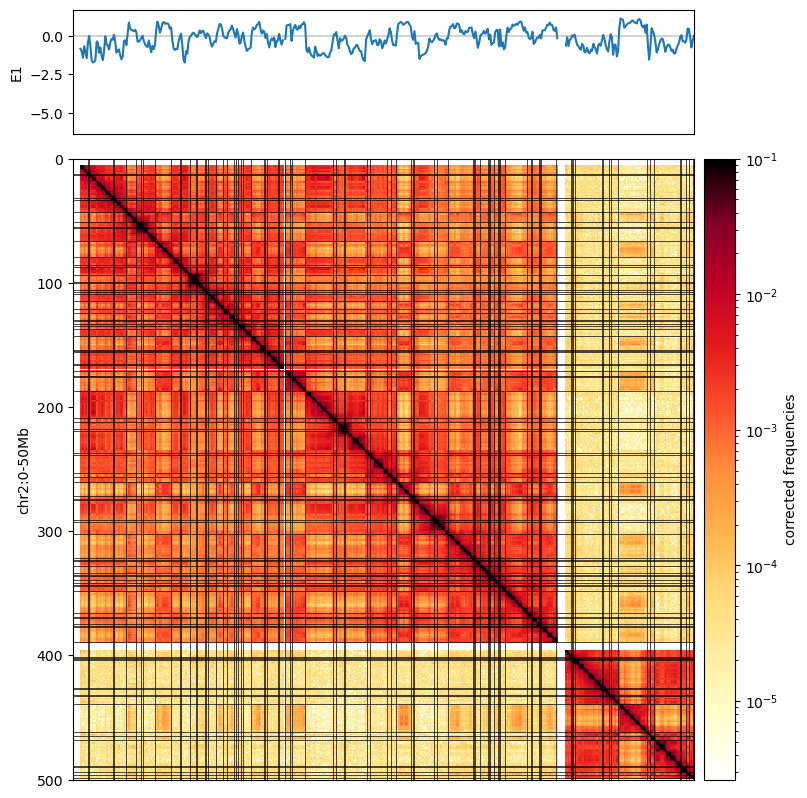

In [26]:
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

f, ax = plt.subplots(
    figsize=(15, 10),
)

norm = LogNorm(vmax=0.1)

im = ax.matshow(
    clr_500kb.matrix()[:],
    norm=norm,
    cmap='fall'
);
plt.axis([0,500,500,0])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='corrected frequencies');
ax.set_ylabel('chr2:0-50Mb')
ax.xaxis.set_visible(False)

ax1 = divider.append_axes("top", size="20%", pad=0.25, sharex=ax)
weights = clr_500kb.bins()[:]['weight'].values
ax1.plot([0,500],[0,0],'k',lw=0.25)
ax1.plot( eigenvector_track_500kb['E1'].values, label='E1')

ax1.set_ylabel('E1')
ax1.set_xticks([]);


for i in np.where(np.diff( (cis_eigs_500kb[1]['E1']>0).astype(int)))[0]:
    ax.plot([0, 500],[i,i],'k',lw=0.5)
    ax.plot([i,i],[0, 500],'k',lw=0.5)

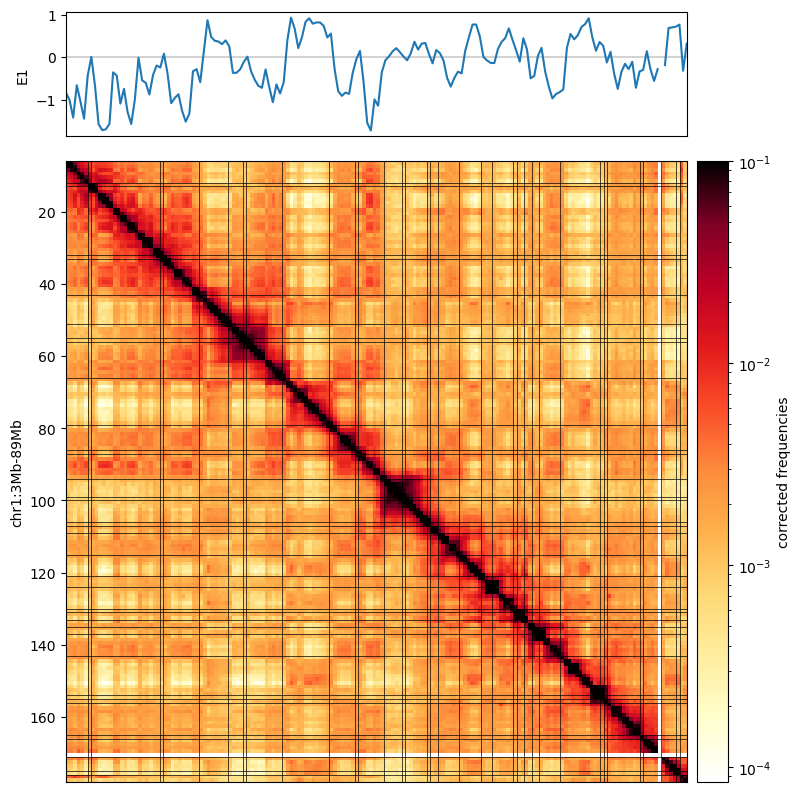

In [29]:
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Define the region
region = ('chr1', 3_000_000, 89_000_000)  # chr1:3Mb-89Mb
matrix = clr_500kb.matrix().fetch(region)  # Fetch the specific region

# Calculate bin positions for proper axis scaling
start_bin = 3_000_000 // clr_500kb.binsize
end_bin = 89_000_000 // clr_500kb.binsize
n_bins = end_bin - start_bin

f, ax = plt.subplots(
    figsize=(15, 10),
)

norm = LogNorm(vmax=0.1)

im = ax.matshow(
    matrix,
    norm=norm,
    cmap='fall',
    extent=(start_bin, end_bin, end_bin, start_bin)  # Set proper extent
);

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='corrected frequencies');
ax.set_ylabel('chr1:3Mb-89Mb')
ax.xaxis.set_visible(False)

# For the eigenvector track, we need to filter it to the same region
region_mask = (
    (eigenvector_track_500kb['chrom'] == 'chr1') & 
    (eigenvector_track_500kb['start'] >= 3_000_000) & 
    (eigenvector_track_500kb['end'] <= 89_000_000)
)
region_eigenvector = eigenvector_track_500kb[region_mask]

ax1 = divider.append_axes("top", size="20%", pad=0.25, sharex=ax)
ax1.plot([start_bin, end_bin], [0,0], 'k', lw=0.25)
ax1.plot(np.linspace(start_bin, end_bin, len(region_eigenvector)), 
         region_eigenvector['E1'].values, 
         label='E1')

ax1.set_ylabel('E1')
ax1.set_xticks([]);

# Add domain boundary lines
for i in np.where(np.diff((region_eigenvector['E1'] > 0).astype(int)))[0]:
    scaled_i = start_bin + (i * (end_bin - start_bin) / len(region_eigenvector))
    ax.plot([start_bin, end_bin], [scaled_i, scaled_i], 'k', lw=0.5)
    ax.plot([scaled_i, scaled_i], [start_bin, end_bin], 'k', lw=0.5)

# validate with 50kb resolution

In [59]:
import bioframe

bins_50kb = clr_50kb.bins()[:]
# Add 'chr' prefix to match fasta chromosome names
#bins_500kb['chrom'] = 'chr' + bins_500kb['chrom'].astype(str)
bins_50kb['chrom'] = bins_50kb['chrom'].astype(str)

# Load the mm10 genome
mm10_path = '/Users/kadendimarco/Desktop/Shrivinas_lab/genome_archetecture/Megaenhancers/experimental_data/mm10.fa'
mm10_genome = bioframe.load_fasta(mm10_path)

# Check what chromosomes are in the mm10 genome
print("Chromosomes in mm10 genome:")
print(list(mm10_genome.keys())[:10])  # Show first 10 chromosomes

# Check what chromosomes are in your bins dataframe
print("\nChromosomes in bins dataframe:")
print(bins_50kb['chrom'].unique()[:10])  # Show first 10 chromosomes

# Check if there's a mismatch
bins_chroms = set(bins_50kb['chrom'].unique())
mm10_chroms = set(mm10_genome.keys())

missing_in_mm10 = bins_chroms - mm10_chroms
missing_in_bins = mm10_chroms - bins_chroms

print(f"\nChromosomes in bins but not in mm10: {missing_in_mm10}")
print(f"Chromosomes in mm10 but not in bins: {missing_in_bins}")

# If there are mismatches, let's see some examples
if missing_in_mm10:
    print(f"\nExamples of problematic chromosomes: {list(missing_in_mm10)[:5]}")
    

Chromosomes in mm10 genome:
['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18']

Chromosomes in bins dataframe:
['chr1' 'chr2' 'chr3' 'chr4' 'chr5' 'chr6' 'chr7' 'chr8' 'chr9' 'chr10']

Chromosomes in bins but not in mm10: set()
Chromosomes in mm10 but not in bins: {'chrUn_GL456367', 'chr4_GL456350_random', 'chr4_JH584294_random', 'chr4_JH584295_random', 'chrUn_GL456389', 'chrUn_GL456393', 'chr1_GL456210_random', 'chrUn_GL456239', 'chrUn_GL456372', 'chr4_JH584292_random', 'chrUn_JH584304', 'chr1_GL456213_random', 'chr5_GL456354_random', 'chr4_GL456216_random', 'chrUn_GL456396', 'chrY_JH584303_random', 'chrUn_GL456394', 'chrUn_GL456360', 'chrY_JH584301_random', 'chr7_GL456219_random', 'chr5_JH584297_random', 'chrY_JH584300_random', 'chrUn_GL456370', 'chrUn_GL456381', 'chr1_GL456211_random', 'chrX_GL456233_random', 'chrUn_GL456390', 'chrUn_GL456392', 'chr4_JH584293_random', 'chr1_GL456212_random', 'chrUn_GL456366', 'chr1_GL456221_random', 'chrM', 'ch

In [60]:
import bioframe
bins_50kb = clr_50kb.bins()[:]
# Add 'chr' prefix to match fasta chromosome names
#bins_500kb['chrom'] = 'chr' + bins_500kb['chrom'].astype(str)
bins_50kb['chrom'] = bins_50kb['chrom'].astype(str)


mm10_genome = bioframe.load_fasta(mm10_path);
## note the next command may require installing pysam
gc_cov_50kb = bioframe.frac_gc(bins_50kb[['chrom', 'start', 'end']], mm10_genome)
#gc_cov.to_csv('mm9_gc_cov_200kb.tsv',index=False,sep='\t')
display(gc_cov_50kb)

,chrom,start,end,GC
0,chr1,0,50000,NaN
1,chr1,50000,100000,NaN
2,chr1,100000,150000,NaN
3,chr1,150000,200000,NaN
4,chr1,200000,250000,NaN
...,...,...,...,...
54515,chrY,91500000,91550000,NaN
54516,chrY,91550000,91600000,NaN
54517,chrY,91600000,91650000,NaN
54518,chrY,91650000,91700000,NaN


In [61]:
view_df_50kb = pd.DataFrame({'chrom': clr_50kb.chromnames,
                        'start': 0,
                        'end': clr_50kb.chromsizes.values,
                        'name': clr_50kb.chromnames}
                      )
display(view_df_50kb)

,chrom,start,end,name
0,chr1,0,195471971,chr1
1,chr2,0,182113224,chr2
2,chr3,0,160039680,chr3
3,chr4,0,156508116,chr4
4,chr5,0,151834684,chr5
5,chr6,0,149736546,chr6
6,chr7,0,145441459,chr7
7,chr8,0,129401213,chr8
8,chr9,0,124595110,chr9
9,chr10,0,130694993,chr10


In [62]:
import bioframe

# First make sure bins have the correct chromosome format for fasta lookup
bins_df_50kb = clr_50kb.bins()[:]
bins_df_50kb['chrom'] = bins_df_50kb['chrom'].astype(str)

# Recalculate GC content
gc_cov_50kb = bioframe.frac_gc(
    bins_df_50kb[['chrom', 'start', 'end']], 
    mm10_genome,
    mapped_only=False
)

# Remove 'chr' prefix to match cooler chromosomes
#gc_cov_500kb['chrom'] = gc_cov_500kb['chrom'].str.replace('chr', '')

# Create proper view_df using bioframe
chromosomes = clr_50kb.chromnames
view_dict = {
    'chrom': chromosomes,
    'start': [0] * len(chromosomes),
    'end': [clr_50kb.chromsizes[chrom] for chrom in chromosomes]
}
view_df_50kb = bioframe.make_viewframe(pd.DataFrame(view_dict))

# Now try calculating eigenvectors
cis_eigs_50kb = cooltools.eigs_cis(
    clr_50kb,
    gc_cov_50kb,
    view_df=view_df_50kb,
    n_eigs=3,
    clr_weight_name='weight'
)

# cis_eigs[0] returns eigenvalues, here we focus on eigenvectors
eigenvector_track_50kb = cis_eigs_50kb[1][['chrom','start','end','E1']]

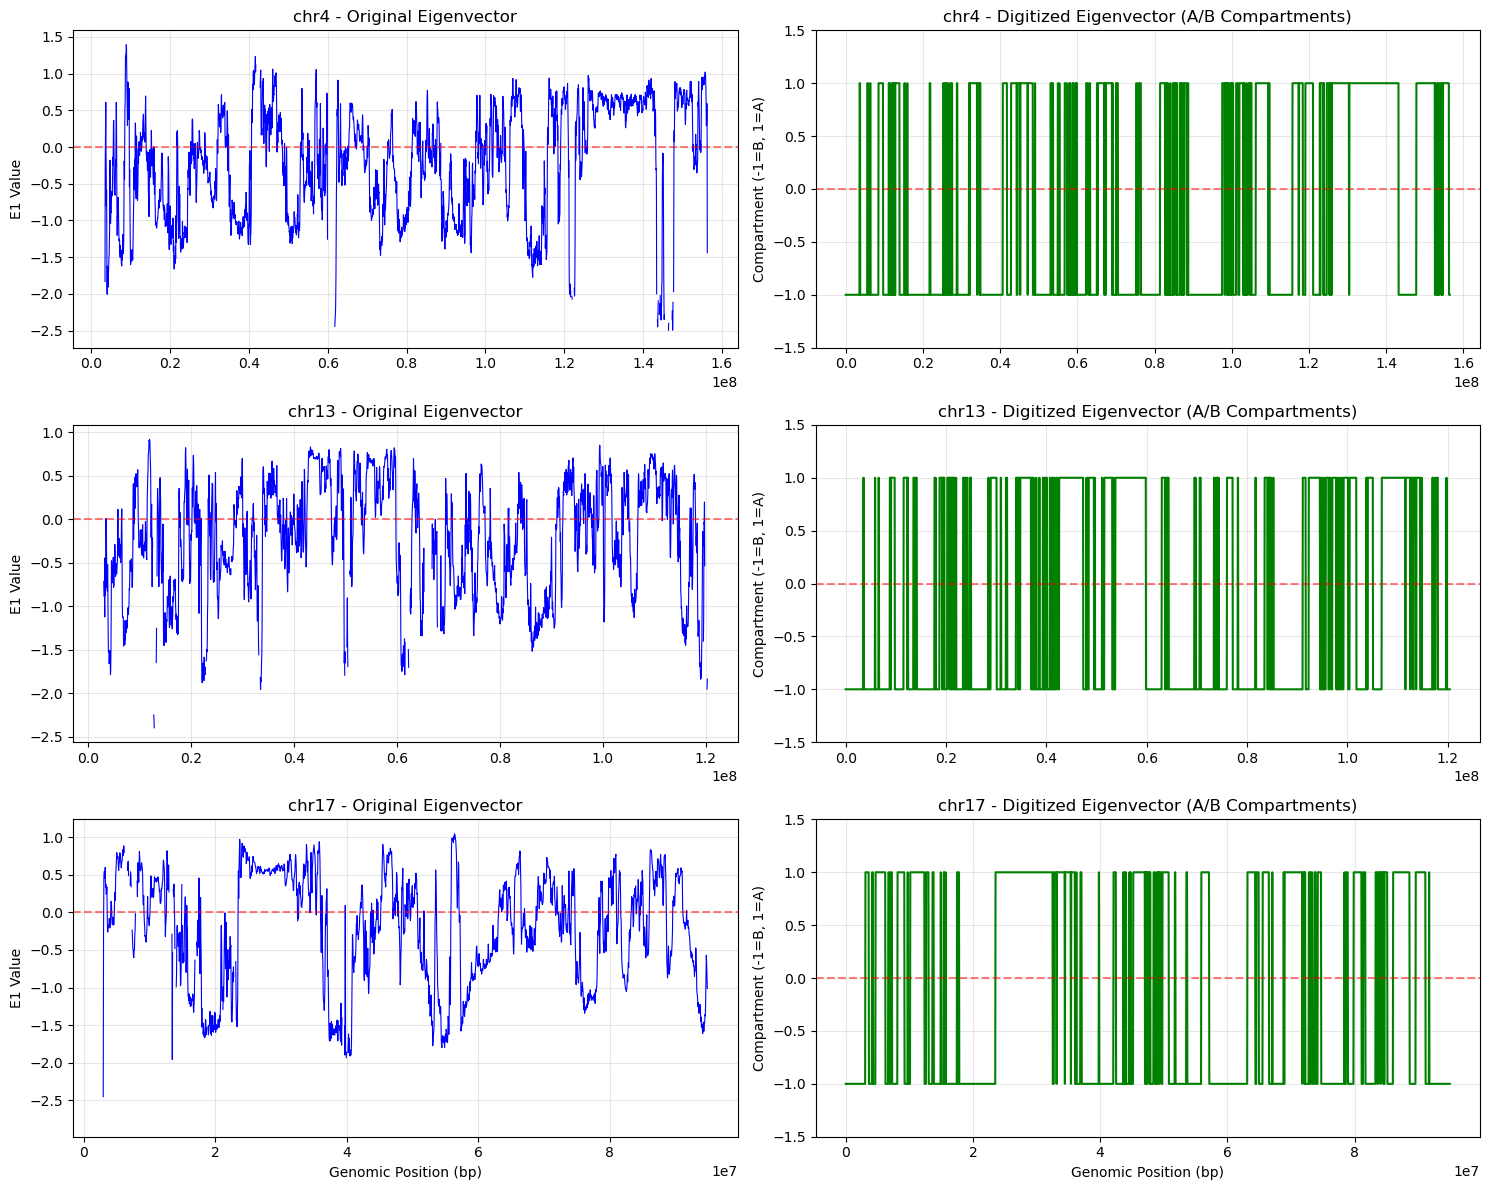

=== COMPARTMENT SUMMARY ===

chr4:
  Total bins: 3131
  A compartments: 1274 bins (40.7%)
  B compartments: 1857 bins (59.3%)

chr13:
  Total bins: 2409
  A compartments: 932 bins (38.7%)
  B compartments: 1477 bins (61.3%)

chr17:
  Total bins: 1900
  A compartments: 815 bins (42.9%)
  B compartments: 1085 bins (57.1%)

=== AVAILABLE DATA ===
Digitized eigenvectors saved for: ['chr4', 'chr13', 'chr17']
Access data using: digitized_eigenvectors_50kb['chr4']['E1_digitized']


In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Define the chromosomes to plot
chroms_to_plot = ['chr4', 'chr13', 'chr17']

# Dictionary to store digitized eigenvectors for each chromosome
digitized_eigenvectors_50kb = {}

# Create subplots
fig, axes = plt.subplots(len(chroms_to_plot), 2, figsize=(15, 4*len(chroms_to_plot)))
if len(chroms_to_plot) == 1:
    axes = axes.reshape(1, -1)

for i, chrom in enumerate(chroms_to_plot):
    # Get data for this chromosome
    chrom_data = eigenvector_track_50kb[eigenvector_track_50kb['chrom'] == chrom]
    
    if len(chrom_data) == 0:
        print(f"No data found for {chrom}")
        continue
    
    
    # Plot original eigenvector
    axes[i, 0].plot(chrom_data['start'], chrom_data['E1'], 'b-', linewidth=0.8)
    axes[i, 0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
    axes[i, 0].set_title(f'{chrom} - Original Eigenvector')
    axes[i, 0].set_ylabel('E1 Value')
    axes[i, 0].grid(True, alpha=0.3)
    
    # Create digitized version
    digitized = np.where(chrom_data['E1'] > 0, 1, -1)
    
    # Save digitized eigenvector for this chromosome
    digitized_eigenvectors_50kb[chrom] = {
        'start': chrom_data['start'].values,
        'end': chrom_data['end'].values,
        'E1_original': chrom_data['E1'].values,
        'E1_digitized': digitized,
        'compartments': np.where(digitized == 1, 'A', 'B')
    }
    
    # Plot digitized eigenvector
    axes[i, 1].plot(chrom_data['start'], digitized, 'g-', linewidth=1.5)
    axes[i, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
    axes[i, 1].set_title(f'{chrom} - Digitized Eigenvector (A/B Compartments)')
    axes[i, 1].set_ylabel('Compartment (-1=B, 1=A)')
    axes[i, 1].set_ylim(-1.5, 1.5)
    axes[i, 1].grid(True, alpha=0.3)
    
    # Add y-axis labels for the rightmost plots
    if i == len(chroms_to_plot) - 1:
        axes[i, 0].set_xlabel('Genomic Position (bp)')
        axes[i, 1].set_xlabel('Genomic Position (bp)')

plt.tight_layout()
plt.show()

# Print summary statistics
print("=== COMPARTMENT SUMMARY ===")
for chrom in chroms_to_plot:
    if chrom in digitized_eigenvectors_50kb:
        data = digitized_eigenvectors_50kb[chrom]
        a_compartments = np.sum(data['E1_digitized'] == 1)
        b_compartments = np.sum(data['E1_digitized'] == -1)
        total_bins = len(data['E1_digitized'])
        
        print(f"\n{chrom}:")
        print(f"  Total bins: {total_bins}")
        print(f"  A compartments: {a_compartments} bins ({a_compartments/total_bins*100:.1f}%)")
        print(f"  B compartments: {b_compartments} bins ({b_compartments/total_bins*100:.1f}%)")

# Print available data for reference
print(f"\n=== AVAILABLE DATA ===")
print(f"Digitized eigenvectors saved for: {list(digitized_eigenvectors_50kb.keys())}")
print(f"Access data using: digitized_eigenvectors_50kb['chr4']['E1_digitized']")

In [75]:
print(digitized_eigenvectors_50kb['chr4']['E1_digitized'])
print(len(digitized_eigenvectors_50kb['chr4']['E1_digitized']))

#remember each index in digitized_eigenvectors is 500kb
print('adding c compartment')

# Change first 6 values to 2 (C compartment) for each chromosome
for chrom in digitized_eigenvectors_50kb:
    digitized_eigenvectors_50kb[chrom]['E1_digitized'][:60] = 2

print(digitized_eigenvectors_50kb['chr4']['E1_digitized'])

print('changing digitized eigenvector to monomer_types')
# Create monomer_types dictionary with same structure as digitized_eigenvectors
monomer_types_50kb = {}

# For each chromosome
for chrom in digitized_eigenvectors_50kb:
    # Get the digitized eigenvector array
    digitized = digitized_eigenvectors_50kb[chrom]['E1_digitized']
    
    # Convert: 1 -> 0 (A compartment), -1 -> 1 (B compartment)
    # 2 remains 2 (C compartment)
    monomer_types_50kb[chrom] = np.where(digitized == 1, 0, 
                                   np.where(digitized == -1, 1, digitized))

print("Conversion complete. Example from chr4:")
print(monomer_types_50kb['chr4'][:20])  # Print first 20 values as example

[ 2  2  2 ... -1 -1 -1]
3131
adding c compartment
[ 2  2  2 ... -1 -1 -1]
changing digitized eigenvector to monomer_types
Conversion complete. Example from chr4:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [76]:
print('averaging monomer_types_50kb and comparing against monomer_types')

# Create averaged monomer types dictionary
averaged_monomer_types = {}

# For each chromosome
for chrom in monomer_types_50kb:
    # Get the monomer types array
    types = monomer_types_50kb[chrom]
    
    # Calculate number of 50kb bins that fit in 500kb
    bins_per_500kb = 10
    
    # Calculate number of complete 500kb segments
    n_segments = len(types) // bins_per_500kb
    
    # Reshape array to group 50kb bins and take mode of each group
    reshaped = types[:n_segments*bins_per_500kb].reshape(-1, bins_per_500kb)
    averaged = np.round(np.mean(reshaped, axis=1)).astype(int)
    
    # Store in dictionary
    averaged_monomer_types[chrom] = averaged

print("\nComparing original and averaged monomer types:")
for chrom in monomer_types_50kb:
    if chrom in monomer_types:
        print(f"\n{chrom}:")
        print("Original monomer_types:")
        print(monomer_types[chrom][:5])
        print("Averaged from 50kb:")
        print(averaged_monomer_types[chrom][:5])
        
        # Check if arrays are equal
        if len(monomer_types[chrom]) == len(averaged_monomer_types[chrom]):
            differences = np.sum(monomer_types[chrom] != averaged_monomer_types[chrom])
            print(f"Number of differences: {differences}")
            if differences > 0:
                print("First few positions with differences:")
                diff_indices = np.where(monomer_types[chrom] != averaged_monomer_types[chrom])[0][:5]
                for idx in diff_indices:
                    print(f"Position {idx}: Original={monomer_types[chrom][idx]}, " 
                          f"Averaged={averaged_monomer_types[chrom][idx]}")
        else:
            print(f"Arrays have different lengths: {len(monomer_types[chrom])} vs "
                  f"{len(averaged_monomer_types[chrom])}")


averaging monomer_types_50kb and comparing against monomer_types

Comparing original and averaged monomer types:

chr4:
Original monomer_types:
[2 2 2 2 2]
Averaged from 50kb:
[2 2 2 2 2]
Arrays have different lengths: 314 vs 313

chr13:
Original monomer_types:
[2 2 2 2 2]
Averaged from 50kb:
[2 2 2 2 2]
Arrays have different lengths: 241 vs 240

chr17:
Original monomer_types:
[2 2 2 2 2]
Averaged from 50kb:
[2 2 2 2 2]
Number of differences: 7
First few positions with differences:
Position 13: Original=0, Averaged=1
Position 14: Original=0, Averaged=1
Position 146: Original=1, Averaged=0
Position 149: Original=1, Averaged=0
Position 159: Original=0, Averaged=1


chr4: 16 differences between 500kb and averaged 50kb monomer types
chr13: 14 differences between 500kb and averaged 50kb monomer types
chr17: 7 differences between 500kb and averaged 50kb monomer types


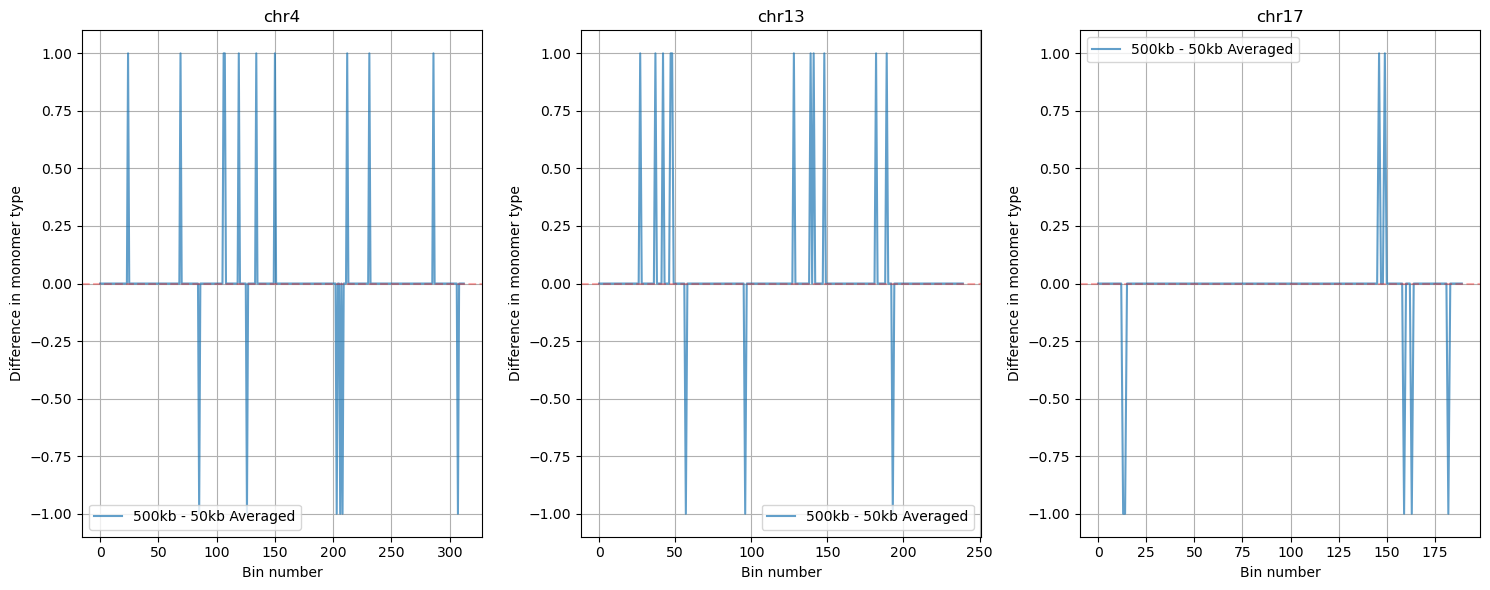

In [83]:
# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
axes = axes.flatten()

# Plot first 3 chromosomes
for i, chrom in enumerate(list(monomer_types.keys())[:3]):
    # Get minimum length to handle shape mismatch
    min_len = min(len(monomer_types[chrom]), len(averaged_monomer_types[chrom]))
    
    # Calculate differences using arrays of same length
    differences = monomer_types[chrom][:min_len] - averaged_monomer_types[chrom][:min_len]
    
    # Plot differences
    axes[i].plot(differences, label='500kb - 50kb Averaged', alpha=0.7)
    axes[i].axhline(y=0, color='r', linestyle='--', alpha=0.3)
    
    axes[i].set_title(f'{chrom}')
    axes[i].set_xlabel('Bin number')
    axes[i].set_ylabel('Difference in monomer type')
    axes[i].legend()
    axes[i].grid(True)
    
    # Print number of differences
    num_differences = np.sum(differences != 0)
    print(f"{chrom}: {num_differences} differences between 500kb and averaged 50kb monomer types")

plt.tight_layout()
plt.show()
